# 利用朴素贝叶斯分类实现手写数字识别

## 导入需要的库

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")  

In [6]:
from sklearn.datasets import load_digits      # 导入手写数字识别数据集
from sklearn.model_selection import train_test_split    # 使用train_test_split方法分割数据集

### 导入本例中用到的几个模型类

In [7]:
from sklearn.naive_bayes import GaussianNB      # 导入高斯贝叶斯分类器
from sklearn.naive_bayes import MultinomialNB     # 导入多项式贝叶斯分类器
from sklearn.naive_bayes import BernoulliNB      # 导入伯努利贝叶斯分类器

## 1. 初探数据

In [22]:
digits = load_digits()    
print(digits.DESCR)     #输出数据集的简介、作者以及参考资料

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

#### 共有1797个样本，每个样本包括8*8像素的图像和一个[0, 9]整数的标签

digits中总共有四种数据：

data:存储各个图片的各个像素，是展开后的一维数组

target:存储每个图片的对应标签

target_names:记录各个标签对应的名字

images:和data数据内容一样，但是类型不同，属于二维数组

#### 属性查看

In [31]:
print(digits.data.shape)   # 查看数据结构
print(digits.images.shape)
print(digits.target_names)    #查看target有哪几个数  

(1797, 64)
(1797, 8, 8)
[0 1 2 3 4 5 6 7 8 9]


####  查看第一张图片

In [14]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

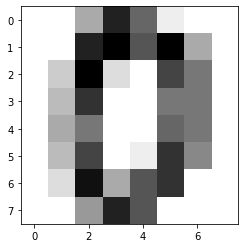

In [17]:
plt.imshow(digits.images[0],cmap = plt.cm.gray_r,interpolation = 'nearest')   

## 2. 比较不同模型的实现效果

高斯朴素贝叶斯分类器(默认条件概率分布概率符合高斯分布)

多项式朴素贝叶斯分类器(条件概率符合多项式分布)

伯努利朴素贝叶斯分类器(条件概率符合二项分布)

In [64]:
'''将数据集划分为70%的训练集和30%的测试集'''
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,random_state=10,test_size=0.3)

In [77]:
'''高斯朴素贝叶斯分类器'''
gnb = GaussianNB()
gnb.fit(X_train, y_train)

'''多项式朴素贝叶斯分类器'''
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

'''努利朴素贝叶斯分类器'''
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

'''输出每个模型的训练集和测试集的分数'''
model = ['GaussianNB','MultinomialNB','BernoulliNB']
clf = [gnb,mnb,bnb]
for clf,model in zip(clf,model):
#     print(f'{model} Training Score: {clf.score(X_train, y_train)}')    # 输出训练集的得分
#     print(f'{model} Testing Score: {clf.score(X_test, y_test)}\n')    #  输出测试集的得分

    print(model + 'Training Score: %.3f' % clf.score(X_train, y_train))
    print(model + 'Testing Score: %.3f' % clf.score(X_test, y_test)+ '\n')

GaussianNBTraining Score: 0.848
GaussianNBTesting Score: 0.813

MultinomialNBTraining Score: 0.909
MultinomialNBTesting Score: 0.885

BernoulliNBTraining Score: 0.865
BernoulliNBTesting Score: 0.831



#### 使用交叉验证方法评估模型的预测性能

In [83]:
from sklearn.model_selection import cross_val_score


model = ['GaussianNB','MultinomialNB','BernoulliNB']
clf = [gnb,mnb,bnb]
for clf,model in zip(clf,model):
    scorete = cross_val_score(clf,digits.data,digits.target,cv=10).mean()
    print(model + ' cross_val_score: %.3f' % scorete)
    

GaussianNB cross_val_score: 0.811
MultinomialNB cross_val_score: 0.880
BernoulliNB cross_val_score: 0.833


#### 从以上三个模型训练的得分可以看出，对于该数据集，三种朴素贝叶斯分类器中多项式朴素贝叶斯分类器的预测性能最好，其次是伯努利朴素贝叶斯分类器，最后是高斯朴素贝叶斯分类器。